In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

print(os.listdir("../input"))


In [ ]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
user_reviews = pd.read_csv("playstore.csv")
playstore_data = pd.read_csv("playstore.csv")

In [6]:
user_reviews.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playstore_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
print('Dimentions of user_review {}'.format(user_reviews.shape))
print('Dimentions of google_playstore {}'.format(playstore_data.shape))
print('Unique Stores {}'.format(len(playstore_data['App'].unique())))

Dimentions of user_review (10841, 13)
Dimentions of google_playstore (10841, 13)
Unique Stores 9660


In [7]:
# In total there are around 64295 reviews further there are 9660 apps and apps can have almost same names with slight change and different maker

In [9]:
# Checking for missing values

print('Missing values in user_reviews {}'.format(user_reviews.isnull().sum()))

Missing values in user_reviews App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [10]:
print('Missing values in Google_play_store {}'.format(playstore_data.isnull().sum()))

Missing values in Google_play_store App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [11]:
# removing the missing values

user_reviews.dropna(inplace=True)

In [12]:
# remove duplicates in play store

#playstore_data.drop_duplicates(inplace=True)
playstore_data= playstore_data.drop_duplicates(subset='App')

In [13]:
playstore_data.shape

(9660, 13)

In [14]:
print('Missing values in Google_play_store {}'.format(playstore_data.isnull().sum()))

Missing values in Google_play_store App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [15]:
playstore_data.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])

In [16]:
playstore_data.shape

(9648, 13)

In [17]:
playstore_data['Rating'].describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [18]:
# filling rating in missing areas by not captured (0)

playstore_data.fillna(0,inplace=True)

In [19]:
playstore_data[playstore_data['Rating'] == 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,0.0,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,0.0,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8,3.0 and up
123,Manicure - nail design,BEAUTY,0.0,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,0.0,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,0.0,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2,2.3 and up


In [20]:
# Descriptive analytics on numerical variables

print(user_reviews.columns)
user_reviews.describe()



Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [21]:

# about 75 percentile of the time sentiment polarity is around 0.4, which is positive
# subjectivity is between 0 and 1, median subjectivity that was understood was 0.51


            Rating
count  9648.000000
mean      3.542651
std       1.574478
min       0.000000
25%       3.600000
50%       4.200000
75%       4.500000
max       5.000000
After removing the missing values in ratings
            Rating
count  8190.000000
mean      4.173321
std       0.536691
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000
excess kurtosis of  distribution : 5.118548660736582
skewness of distribution: -1.7440136482756994


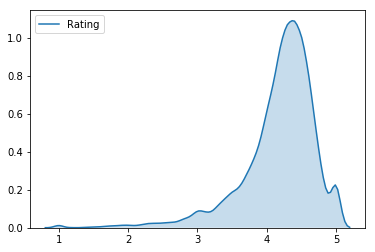

In [22]:
# descriptive analysis on play store

print(playstore_data.describe())
# density plot shape
rating = playstore_data[playstore_data['Rating'] != 0 ]
print("After removing the missing values in ratings")
print(rating.describe())
sns.kdeplot(shade=True,data=rating['Rating'])

from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)
print( 'excess kurtosis of  distribution : {}'.format( kurtosis(rating['Rating']) ))
print( 'skewness of distribution: {}'.format( skew(rating['Rating']) ))


In [23]:
# Rating is  Left skewed(Negatively skewed) and median value is around 4.3 from discriptive analysis and density plot
#Kurtosis is around 5.5 that means data is above normal distribution 
# this a actually a good this a rating is above 4 thats a good indication that most of the apps are liked by users


In [24]:
# Univariate analysis

In [25]:
# Bar plot on categorical variable

df1 = user_reviews['Sentiment'].value_counts()
df1 = df1.reset_index()
def bar_plot(x,y,y_label,title,color):
    objects = x.values
    y_pos = np.arange(len(objects))
    plt.figure(figsize=(10,5))
    bar = plt.bar(x,y,color=color)
    plt.xticks(y_pos, objects)
    plt.ylabel(y_label)
    plt.title(title)
    
    return bar
    

In [26]:
df1['index'].values

array(['Positive', 'Negative', 'Neutral'], dtype=object)

<BarContainer object of 3 artists>

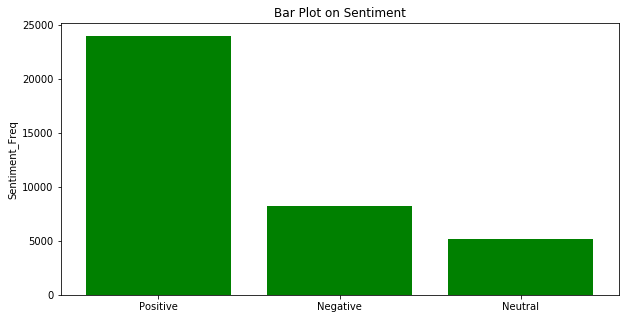

In [27]:
bar_plot(x = df1['index'],y = df1['Sentiment'],color='g',y_label = 'Sentiment_Freq',title = 'Bar Plot on Sentiment')


In [28]:
playstore_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
# visualize the following
# 1. how many apps are free vs paid
# 2. how many genres are there
# 3. represent installs
# 4. represent Content Rating





In [30]:
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [31]:
list_1 = ['Category', 'Installs', 'Type',
        'Content Rating']

In [32]:
def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

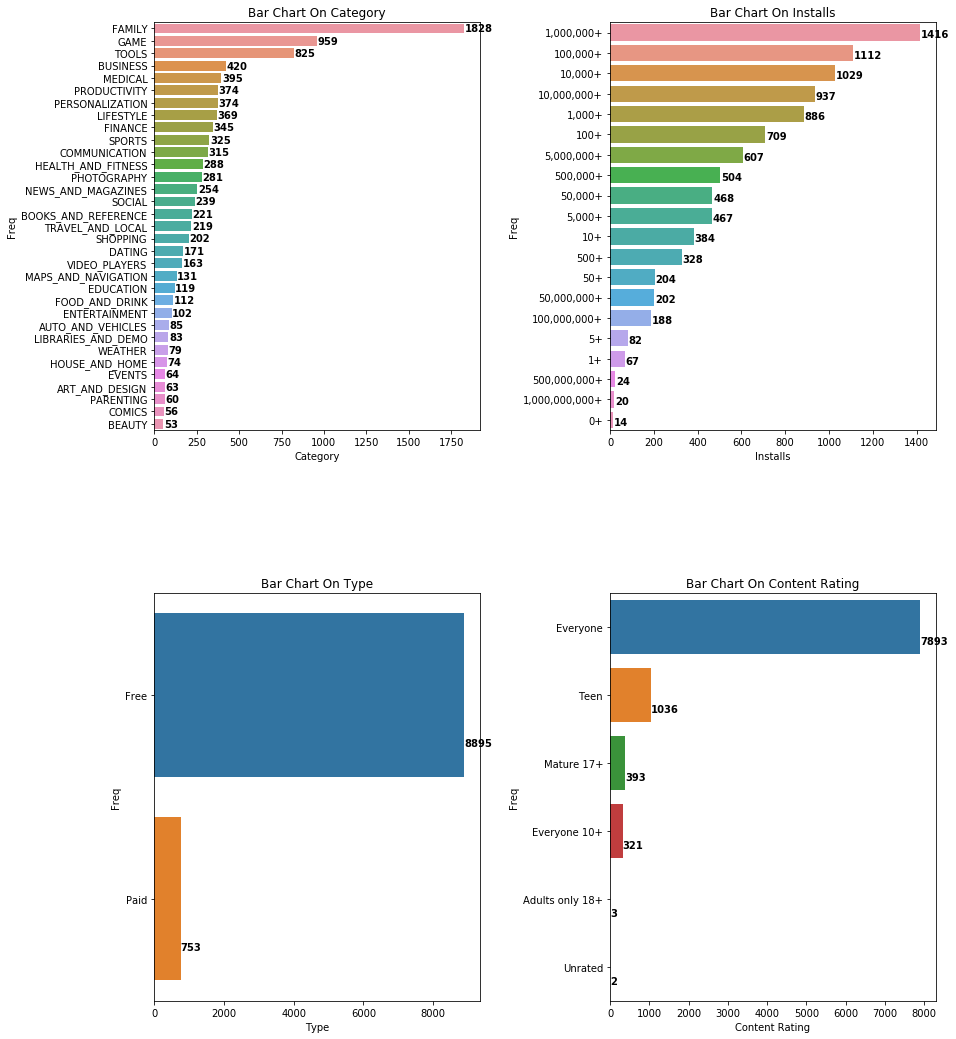

In [33]:
fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = playstore_data[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label=names)
    i += 1

In [34]:
# from the above viz we can see that free apps are more then paid apps in this dataset
# from installs we find that there are 20 apps which have like 1 billion downloads
# 100 Million installs are around for 188 apps and majority of installs are in 1 million and above 10 million installs


In [35]:
list_2 = ['Genres']

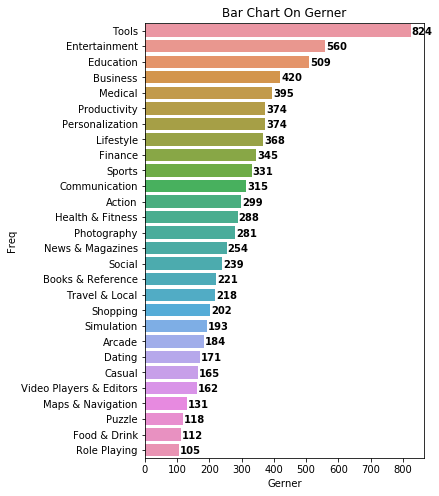

In [36]:
def bar_plot(x,y,y_label,x_label,title,color,ax=None):
    plt.figure(figsize=(5,8))
    bar = sns.barplot(x = x,y=y,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        bar.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar
df2 = playstore_data['Genres'].value_counts()
df2 = df2.reset_index()
df2 = df2[df2['Genres'] > 100]
bar_plot(x = df2['Genres'],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On Gerner',color='red',x_label='Gerner')
   

In [37]:
# highest apps are made on tools, entertainment and education

In [38]:
""" Analysis on Apps most popular apps in terms of installs
% of free and paid apps
10 rated apps with installs of 100 million
update year wise
Avg app size by genre"""


' Analysis on Apps most popular apps in terms of installs\n% of free and paid apps\n10 rated apps with installs of 100 million\nupdate year wise\nAvg app size by genre'

In [39]:
# Apps with 1 billion downloads
playstore_data[playstore_data['Installs'] == '1,000,000,000+']['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

In [40]:
genres=  list(df2['index'][1:10])

In [41]:
d = pd.DatetimeIndex(playstore_data['Last Updated'])
playstore_data['year'] = d.year
playstore_data['month'] = d.month

In [42]:
for i in genres:
    
    play = playstore_data[(playstore_data['Installs'] != '1,000,000,000+') & (playstore_data['Genres'] == i) & (playstore_data['Rating'] >= 4.5) & (playstore_data['year'] == 2018)]['App']
    print('')
    print('Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in {}'.format(i))
    print('--------------------------------------------------')
    print(play[0:10])


Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Entertainment
--------------------------------------------------
876                     ivi - movies and TV shows in HD
882    🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
883            Movies by Flixster, with Rotten Tomatoes
889      Twitch: Livestream Multiplayer Games & Esports
899                   Fandango Movies - Times + Tickets
911                          Investigation Discovery GO
941                                             CW Seed
945                                                 WWE
991                      ColorFul - Adult Coloring Book
994                         Hamilton — The Official App
Name: App, dtype: object

Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Education
--------------------------------------------------
700                                TED
702                       Khan Academy
703         Learn English with Wlingua
707       

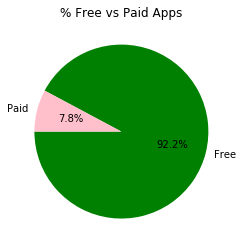

In [43]:

# % free vs paid apps

size=[8895,753]
sentiment = ['Free', 'Paid']
colors = ['g', 'pink']
plt.pie(size, labels=sentiment, colors=colors, startangle=180, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()


In [44]:
# avg app size
size = playstore_data[playstore_data['Size'] != 'Varies with device']
size_m = []
size_n = []
for i in size['Size']:
    size_m.append(i[-1])
    size_n.append(float(i[0:-1]))
    
size['size_m'] = size_m
size['size_n'] = size_n
size['size_m'] = size['size_m'].replace('k',1000)
size['size_m'] = size['size_m'].replace('M',1000000)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [45]:
size['bites'] = size['size_n'] * size['size_m']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
# avg app size

grouped = size.groupby('Category').agg({'bites': [min, max]})
grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={"min": "min_size", "max": "max_size"})
grouped.head(10)


,min,max
Category,,
ART_AND_DESIGN,1200000.0,39000000.0
AUTO_AND_VEHICLES,201000.0,97000000.0
BEAUTY,2200000.0,57000000.0
BOOKS_AND_REFERENCE,93000.0,87000000.0
BUSINESS,23000.0,98000000.0
COMICS,444000.0,40000000.0
COMMUNICATION,17000.0,66000000.0
DATING,18000.0,77000000.0
EDUCATION,526000.0,97000000.0


In [47]:
size.groupby('Category')['bites'].mean().head(10)


Category
ART_AND_DESIGN         1.252951e+07
AUTO_AND_VEHICLES      2.003715e+07
BEAUTY                 1.379574e+07
BOOKS_AND_REFERENCE    1.319935e+07
BUSINESS               1.386719e+07
COMICS                 1.379496e+07
COMMUNICATION          1.130743e+07
DATING                 1.566112e+07
EDUCATION              1.905710e+07
ENTERTAINMENT          2.304375e+07
Name: bites, dtype: float64

In [48]:
# app update

print('# of apps not been updated since 2016 {}'.format(len(playstore_data[playstore_data['year'] < 2016])))
print('# of apps not been updated since 2015 {}'.format(len(playstore_data[playstore_data['year'] < 2015])))
print('# of apps not been updated since 2014 {}'.format(len(playstore_data[playstore_data['year'] < 2014])))                                                       
                                                        

# of apps not been updated since 2016 801
# of apps not been updated since 2015 352
# of apps not been updated since 2014 149


In [49]:
# there are around 801 apps that are not been updated since 2 years,these apps might not be in service

In [50]:
# analysis on paid apps

paided = playstore_data[playstore_data['Type'] == 'Paid']

Text(0.5, 1.0, '% Distribution of Paided Apps Categories')

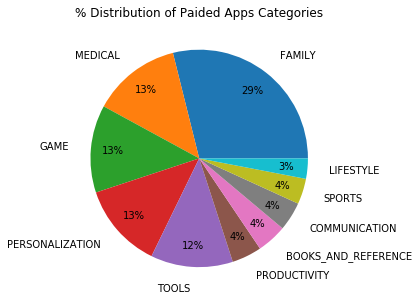

In [51]:
df3 = paided['Category'].value_counts()
df3 = df3.reset_index()
df3 = df3[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(df3['Category']), labels=list(df3['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paided Apps Categories')

In [52]:
# Medial apps have  13 % of share, further analysis is required understand medical apps 


In [53]:
# Top rated paid apps with installs 1,000,000+

paided[(paided['Rating'] > 4.7) & (paided['Installs'] == '100,000+') ]['App']



235          Tiny Scanner Pro: PDF Doc Scan
1341         Relax Melodies P: Sleep Sounds
1833                     The Room: Old Sins
3658                       Weather Live Pro
4556                          Day R Premium
6680                            QR Code Pro
8171                  The House of Da Vinci
10531    Kernel Manager for Franco Kernel ✨
Name: App, dtype: object